# Using KNN for classification

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import PIL
import matplotlib.pyplot as plt
from typing import Tuple
from tqdm import tqdm
from PIL import Image
from helper_func import load_image, PIL_resize, PIL_resize_ws, data_loader
from utils import nearest_neighbor_classify
from matplotlib.pyplot import imshow
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from helper_func import generate_confusion_matrix

In [2]:
train = pd.read_csv('garbage-classification/zero-indexed-files.csv')
data = []
labels = train['Label'].values
for i in tqdm(range(train.shape[0])):
    img = load_image('garbage-classification/data/'+train['Name'][i]+'.jpg', True)
    img = PIL_resize_ws(img, 32)
    data.append(img)
data = np.asarray(data)
print("Training data size: ", data.shape)
print("Training label size: ", labels.shape)

100%|██████████| 2527/2527 [00:22<00:00, 110.80it/s]

Training data size:  (2527, 32, 32)
Training label size:  (2527,)


In [3]:
num_classified = 6
classified_name = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]
training_data, training_labels, testing_data, testing_labels = data_loader(train, data, labels, num_classified=num_classified, rgb=False, ratio=0.9)

Training data shape:  torch.Size([2271, 32, 32])
Training labels shape:  torch.Size([2271])
Testing data shape:  torch.Size([256, 32, 32])
Testing labels shape:  torch.Size([256])


In [4]:
f_training_data = training_data.reshape((training_data.shape[0],training_data.shape[1]*training_data.shape[2]))
f_testing_data = testing_data.reshape((testing_data.shape[0],testing_data.shape[1]*testing_data.shape[2]))

predicted = nearest_neighbor_classify(f_training_data, list(training_labels), f_testing_data, k=num_classified)
predicted = list(predicted[i].item() for i in range(len(predicted)))

In [5]:
accuracy = 0.0
for i in range(len(predicted)):
    if predicted[i] == testing_labels[i]:
        accuracy += (1.0/len(predicted))
print("Accuracy: ", accuracy)

Accuracy:  0.30078125


Normalized confusion matrix


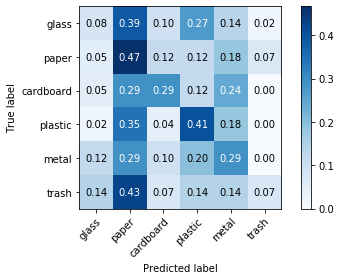

In [6]:
generate_confusion_matrix(testing_labels, predicted, classified_name, normalize=True)
plt.show()

## SIFT feature with NN classifier

In [7]:
train = pd.read_csv('garbage-classification/zero-indexed-files.csv')
data = []
labels = train['Label'].values
for i in tqdm(range(train.shape[0])):
    img = load_image('garbage-classification/data/'+train['Name'][i]+'.jpg', True)
    img = PIL_resize_ws(img, 128)
    data.append(img)
data = np.asarray(data)
print("Training data size: ", data.shape)
print("Training label size: ", labels.shape)

100%|██████████| 2527/2527 [00:22<00:00, 113.84it/s]


Training data size:  (2527, 128, 128)
Training label size:  (2527,)


In [8]:
training_data, training_labels, testing_data, testing_labels = data_loader(train, data, labels, num_classified=num_classified, rgb=False, ratio=0.9)


Training data shape:  torch.Size([2271, 128, 128])
Training labels shape:  torch.Size([2271])
Testing data shape:  torch.Size([256, 128, 128])
Testing labels shape:  torch.Size([256])


In [9]:
training_data = np.swapaxes(training_data, 1,2)
testing_data = np.swapaxes(testing_data, 1,2)

import os.path as osp
import KNN
import pickle
vocab_filename = "../project/vocab.pkl"
if not osp.isfile(vocab_filename):
    vocab_size = 60
    vocab = KNN.build_vocabulary(list(training_data), vocab_size)
    with open(vocab_filename, 'wb') as f:
        pickle.dump(vocab, f)


In [ ]:
with open(vocab_filename, 'rb') as f:
    vocabulary = pickle.load(f)
train_image_feats = KNN.get_bags_of_sifts(list(training_data), vocabulary)
test_image_feats = KNN.get_bags_of_sifts(list(testing_data), vocabulary)
predicted = nearest_neighbor_classify(train_image_feats, list(training_labels), test_image_feats, k=num_classified)
predicted = list(predicted[i].item() for i in range(len(predicted)))

In [ ]:
accuracy = 0.0
for i in range(len(predicted)):
    if predicted[i] == testing_labels[i]:
        accuracy += (1.0/len(predicted))
print("Accuracy: ", accuracy)

In [ ]:
generate_confusion_matrix(testing_labels, predicted, classified_name, normalize=True)
plt.show()